In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [56]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [91]:
prop_df = pd.read_csv("prop_count.csv", index_col=0)
prop_df.fillna(0, inplace=True)
prop_df = prop_df.astype(int)
prop_df.head()

,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,BeeMusic.Importer (https://beemusic.kantarmedia.fr/; *),C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.6.0,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),MediaWiki/1.30.0-wmf.*,MovieGuide-wikidata/0.1,PBB_core fastrun,PetScan,Python-httplib2,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,SQID Python Helper,WikidataR - https://github.com/Ironholds/WikidataR,YTCleaner,__find_genus,__match_or_create_species,__match_taxon,automatch,auxiliary_matcher,awarder,axios,beaTunes,beacon,bot_commons,botanists,browser,coords2json,curl,fix_items,https://github.com/bearloga/WikidataQueryServiceR,...,PetScan__total,Python-httplib2__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,SQID Python Helper__total,WikidataR - https://github.com/Ironholds/WikidataR__total,YTCleaner__total,__find_genus__total,__match_or_create_species__total,__match_taxon__total,automatch__total,auxiliary_matcher__total,awarder__total,axios__total,beaTunes__total,beacon__total,bot_commons__total,botanists__total,browser__total,coords2json__total,curl__total,fix_items__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,microsync__total,misc__total,missing_wp_animal_audio__total,new_resolve_authors__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,orcidator__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,resolver__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,thorough_name_match__total,translate_items_with_property__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
P698,14939845,15752202,515,14939322,8,3103,15703193,45906,7,0,78,0,0,12,0,0,0,0,0,0,199,0,3678,0,14933216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,99,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,99,2,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,2033,0,0,0,0,0,0,0
P932,7681907,10052851,58,7681848,1,150,10052511,190,7,0,74,0,0,10,0,0,0,0,0,0,179,0,1600,0,7677869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,2099,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,2099,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,6,0,2,0,0,0,0,0,0,0
P31,5372470,21619471,124365,5243926,4179,288783,20053361,1277327,785474,31095,158908,1261,0,8,7530,62042,0,402,27848,0,8627,0,0,0,88159,16704,1,29228,196660,105520,21318,2,0,0,0,0,0,0,0,1,2,43919,0,2,0,418462,0,121,0,86,...,16704,1,29228,196660,105520,21318,2,0,0,0,0,0,0,0,1,2,43919,0,2,0,418462,0,121,0,86,122257,0,7584,0,0,3,1964,10552,3230,13,0,196322,9622,1314288,260,0,1008,1705984,1108,5,0,1,7,10,1
P279,3714980,15840789,51447,3660835,2698,112439,15422687,305663,117715,1655,10289,0,0,1,0,97,0,1563,23196,0,1226,0,13629,0,114167,331,0,10541,158831,105517,30748,0,0,0,0,0,0,19,0,1,0,22542,0,0,0,465389,0,76,0,63,...,331,0,10541,158831,105517,30748,0,0,0,0,0,0,19,0,1,0,22542,0,0,0,465389,0,76,0,63,0,10,7499,0,0,0,0,21100,1125,0,0,196322,10887,756168,52,1,757,1644043,540,0,0,0,3,0,1
P625,1237330,7305260,35462,1201069,799,213063,7063722,28475,69185,11,137540,0,0,0,0,1169,0,778520,1348,0,1737,0,82324,0,0,104,0,2207,26,0,4,0,952,0,0,0,0,0,3459,0,0,0,0,0,0,131360,27,9,0,68,...,104,0,2207,26,0,4,0,952,0,0,0,0,0,3459,0,0,0,0,0,0,131360,27,9,0,68,0,0,2675,0,0,0,0,0,0,0,0,594,3840,6299,68,0,0,14298,0,0,0,0,0,1,0


### Column Definitions
`unique: number of unique queries that contain this ID
total: number of total queries that contain this ID
organic/robotic/robotic,organic: unique queries classified using the organic/robotic from the original file
xxx___total: total counts (not unique counts)
other columns: unique counts by useragent
other columns__total: total counts by useragent`

In [92]:
prop_df['nonPBB'] = prop_df['unique'] - prop_df['PBB_core fastrun']
prop_df['nonPBB__total'] = prop_df['total'] - prop_df['PBB_core fastrun__total']

In [93]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total', 'nonPBB', 'nonPBB__total']
cols = list(set(prop_df.columns) - set(vc))
prop_df = prop_df[vc + cols]
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,misc,Java/1.7.0,Python-httplib2__total,MovieGuide-wikidata/0.1,curl__total,YTCleaner,Asparagus/Asparagus 0.1__total,browser__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,C++ WikiAPI,Apache-Jena-ARQ,Apache-Jena-ARQ__total,MovieGuide-wikidata/0.1__total,orcidator,Ruby,axios,__match_or_create_species,__match_taxon,awarder,PetScan,"robotic,organic",taxon_matcher,missing_wp_animal_audio,coords2json__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,bot_commons,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/)__total,bot_commons__total,microsync__total,https://github.com/bearloga/WikidataQueryServiceR,Jakarta Commons-HttpClient/3.1,wdq_image_feed,sparqlwrapper * (rdflib.github.io/sparqlwrapper),wd_edit_stats,thorough_name_match__total,update_dynamic,Magnus labs tools,beacon,...,"robotic,organic__total",node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),browser,auxiliary_matcher__total,okhttp/3.4.1__total,__match_taxon__total,Python-httplib2,wd_edit_stats__total,Java/1.6.0,resolver__total,fix_items,MediaWiki/1.30.0-wmf.*__total,https://github.com/bearloga/WikidataQueryServiceR__total,WikidataR - https://github.com/Ironholds/WikidataR__total,thorough_name_match,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Pywikibot/3.0-dev__total,query,__find_genus__total,automatch__total,WikidataR - https://github.com/Ironholds/WikidataR,botanists,MediaWiki/1.30.0-wmf.*,QueryBot/0.1__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,query__total,orcid_bot__total,taxon_matcher__total,Java/1.8.0__total,Python-urllib,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,GuzzleHttp,Java/1.7.0__total,PetScan__total,curl,testing__total,other,C++ WikiAPI__total,awarder__total,automatch,rest-client2.0.* (*) ruby/*__total,new_resolve_authors,jgonsior-tree__total,Ruby__total,images_on_wikidata_not_wikipedia__total,beaTunes,microsync,fix_items__total,testing
P698,14939845,15752202,515,3103,14939322,15703193,14933216,14933216,6629,818986,0,0,0,0,0,0,0,523,0,0,0,12,78,78,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,2,0,0,2033,0,0,0,199,0,...,45906,0,0,523,0,0,0,0,0,0,0,99,3678,2,0,0,2033,0,0,0,0,0,0,3678,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,0,0,0,0,0,0,0,0,0,99,0
P932,7681907,10052851,58,150,7681848,10052511,7677869,7677869,4038,2374982,0,0,0,0,0,0,0,59,0,0,0,10,74,74,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,179,0,...,190,0,0,59,0,0,0,0,0,0,6,2099,1600,0,0,0,2,0,0,0,0,0,0,1600,0,0,0,0,0,0,0,0,0,0,1,0,0,2,10,0,0,0,0,0,0,0,0,0,2099,0
P31,5372470,21619471,124365,288783,5243926,20053361,88159,88159,5284311,21531312,0,402,1,0,121,0,1261,418462,0,196322,196322,8,158908,158908,0,0,21318,2,0,0,1,16704,4179,1108,3,0,10552,2,0,2,0,86,62042,1,1705984,10,0,7,8627,0,...,1277327,10552,0,418462,0,3230,0,1,10,0,0,0,0,86,0,0,1705984,196660,260,0,0,0,0,0,105520,7584,260,13,1108,27848,29228,0,7530,402,16704,121,5,9622,8,1,0,1008,1964,0,21318,122257,43919,0,0,5
P279,3714980,15840789,51447,112439,3660835,15422687,114167,114167,3600813,15726622,0,1563,0,0,76,0,0,465389,0,196322,196322,1,10289,10289,0,0,30748,0,0,0,1,331,2698,540,0,0,21100,0,0,0,0,63,97,1,1644043,0,0,3,1226,0,...,305663,21100,0,465389,0,1125,0,0,0,0,1,0,13629,63,0,0,1644043,158831,52,0,19,0,0,13629,105517,7499,52,0,540,23196,10541,0,0,1563,331,76,0,10887,1,1,19,757,0,10,30748,0,22542,0,0,0
P625,1237330,7305260,35462,213063,1201069,7063722,0,0,1237330,7305260,0,778520,0,0,9,0,0,131360,0,594,594,0,137540,137540,0,0,4,0,0,0,0,104,799,0,0,27,0,0,0,0,0,68,1169,0,14298,1,0,0,1737,0,...,28475,0,0,131360,3459,0,0,0,1,0,0,0,82324,68,952,0,14298,26,68,0,0,952,0,82324,0,2675,68,0,0,1348,2207,0,0,778520,104,9,0,3840,0,0,0,0,0,0,4,

In [6]:
query = """
SELECT ?prop ?propLabel WHERE {
?prop wikibase:propertyType ?pt .
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
prop_label_df = wdi_core.WDItemEngine.execute_sparql_query(query, as_dataframe=True)
prop_label_df.prop = prop_label_df.prop.str.replace("http://www.wikidata.org/entity/", "")
prop_label = dict(zip(prop_label_df.prop, prop_label_df.propLabel))

In [96]:
prop_df.index = prop_df.index.map(prop_label.get)
prop_df = prop_df.iloc[prop_df.index.notnull(),:]
prop_df.head(5)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,misc,Java/1.7.0,Python-httplib2__total,MovieGuide-wikidata/0.1,curl__total,YTCleaner,Asparagus/Asparagus 0.1__total,browser__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,C++ WikiAPI,Apache-Jena-ARQ,Apache-Jena-ARQ__total,MovieGuide-wikidata/0.1__total,orcidator,Ruby,axios,__match_or_create_species,__match_taxon,awarder,PetScan,"robotic,organic",taxon_matcher,missing_wp_animal_audio,coords2json__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,bot_commons,Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/)__total,bot_commons__total,microsync__total,https://github.com/bearloga/WikidataQueryServiceR,Jakarta Commons-HttpClient/3.1,wdq_image_feed,sparqlwrapper * (rdflib.github.io/sparqlwrapper),wd_edit_stats,thorough_name_match__total,update_dynamic,Magnus labs tools,beacon,...,"robotic,organic__total",node-fetch/1.0 (+https://github.com/bitinn/node-fetch),Mechanize/2.7.5 Ruby/2.2.7p470 (http://github.com/sparklemotion/mechanize/),browser,auxiliary_matcher__total,okhttp/3.4.1__total,__match_taxon__total,Python-httplib2,wd_edit_stats__total,Java/1.6.0,resolver__total,fix_items,MediaWiki/1.30.0-wmf.*__total,https://github.com/bearloga/WikidataQueryServiceR__total,WikidataR - https://github.com/Ironholds/WikidataR__total,thorough_name_match,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Pywikibot/3.0-dev__total,query,__find_genus__total,automatch__total,WikidataR - https://github.com/Ironholds/WikidataR,botanists,MediaWiki/1.30.0-wmf.*,QueryBot/0.1__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,query__total,orcid_bot__total,taxon_matcher__total,Java/1.8.0__total,Python-urllib,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,GuzzleHttp,Java/1.7.0__total,PetScan__total,curl,testing__total,other,C++ WikiAPI__total,awarder__total,automatch,rest-client2.0.* (*) ruby/*__total,new_resolve_authors,jgonsior-tree__total,Ruby__total,images_on_wikidata_not_wikipedia__total,beaTunes,microsync,fix_items__total,testing
PubMed ID,14939845,15752202,515,3103,14939322,15703193,14933216,14933216,6629,818986,0,0,0,0,0,0,0,523,0,0,0,12,78,78,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,2,0,0,2033,0,0,0,199,0,...,45906,0,0,523,0,0,0,0,0,0,0,99,3678,2,0,0,2033,0,0,0,0,0,0,3678,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,0,0,0,0,0,0,0,0,0,99,0
PMCID,7681907,10052851,58,150,7681848,10052511,7677869,7677869,4038,2374982,0,0,0,0,0,0,0,59,0,0,0,10,74,74,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,179,0,...,190,0,0,59,0,0,0,0,0,0,6,2099,1600,0,0,0,2,0,0,0,0,0,0,1600,0,0,0,0,0,0,0,0,0,0,1,0,0,2,10,0,0,0,0,0,0,0,0,0,2099,0
instance of,5372470,21619471,124365,288783,5243926,20053361,88159,88159,5284311,21531312,0,402,1,0,121,0,1261,418462,0,196322,196322,8,158908,158908,0,0,21318,2,0,0,1,16704,4179,1108,3,0,10552,2,0,2,0,86,62042,1,1705984,10,0,7,8627,0,...,1277327,10552,0,418462,0,3230,0,1,10,0,0,0,0,86,0,0,1705984,196660,260,0,0,0,0,0,105520,7584,260,13,1108,27848,29228,0,7530,402,16704,121,5,9622,8,1,0,1008,1964,0,21318,122257,43919,0,0,5
subclass of,3714980,15840789,51447,112439,3660835,15422687,114167,114167,3600813,15726622,0,1563,0,0,76,0,0,465389,0,196322,196322,1,10289,10289,0,0,30748,0,0,0,1,331,2698,540,0,0,21100,0,0,0,0,63,97,1,1644043,0,0,3,1226,0,...,305663,21100,0,465389,0,1125,0,0,0,0,1,0,13629,63,0,0,1644043,158831,52,0,19,0,0,13629,105517,7499,52,0,540,23196,10541,0,0,1563,331,76,0,10887,1,1,19,757,0,10,30748,0,22542,0,0,0
coordinate location,1237330,7305260,35462,213063,1201069,7063722,0,0,1237330,7305260,0,778520,0,0,9,0,0,131360,0,594,594,0,137540,137540,0,0,4,0,0,0,0,104,799,0,0,27,0,0,0,0,0,68,1169,0,14298,1,0,0,1737,0,...,28475,0,0,131360,3459,0,0,0,1,0,0,0,82324,68,952,0,14298,26,68,0,0,952,0,82324,0,2675,68,0,0,1348,2207,0,

In [97]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


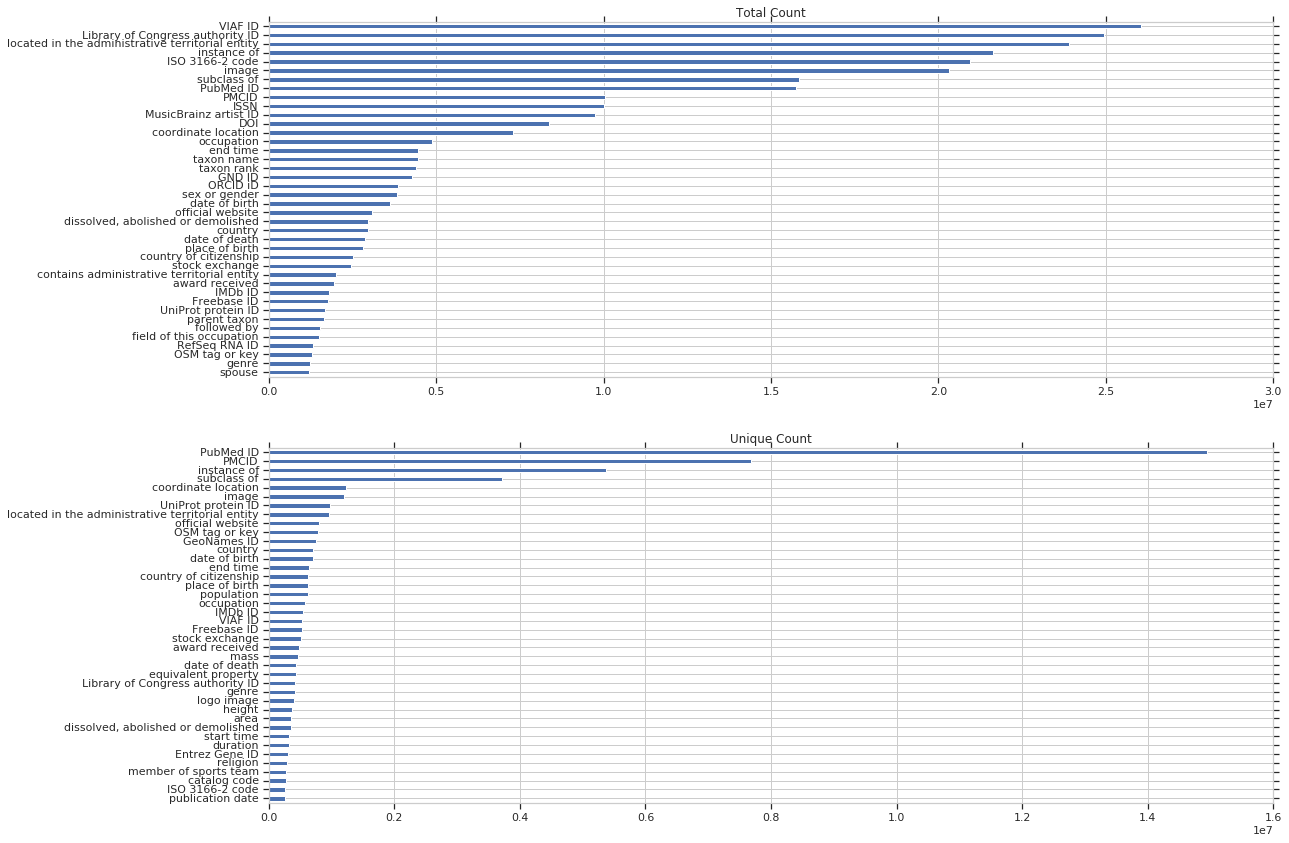

In [98]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("total")[-40:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("unique")[-40:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

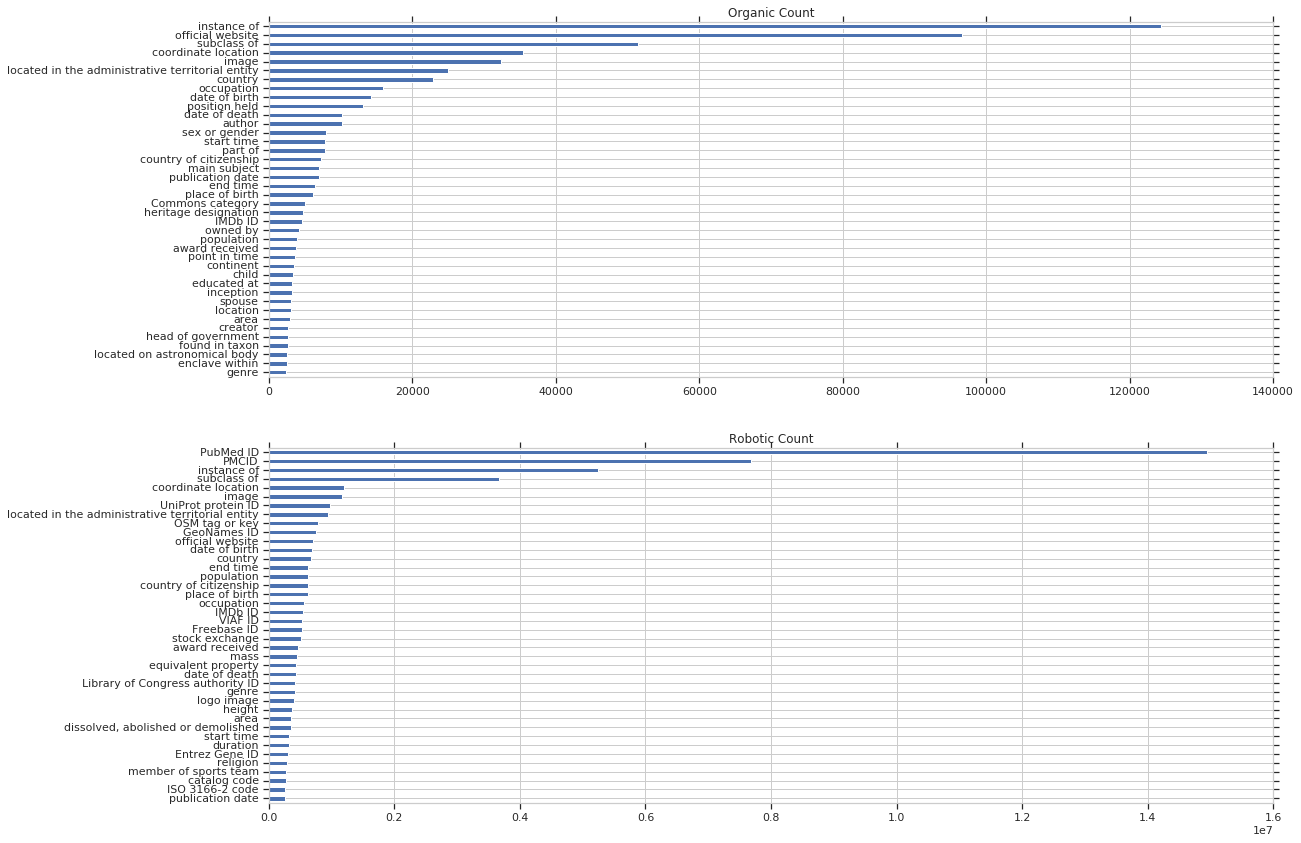

In [99]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("organic")[-40:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("robotic")[-40:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [141]:
ua_cols = set(prop_df.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

In [142]:
# most used props by useragents
ua_prop_df = prop_df.loc[:,ua_cols].apply(lambda x:np.log10(x+1))
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:10].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:10].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:10].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:10].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


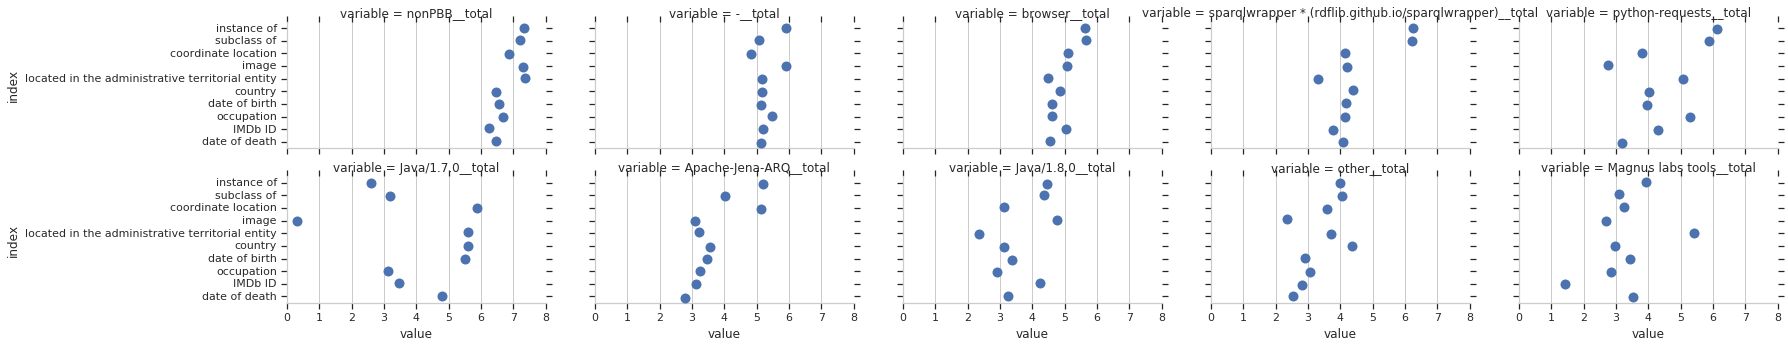

In [102]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=5, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(0, 8))

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


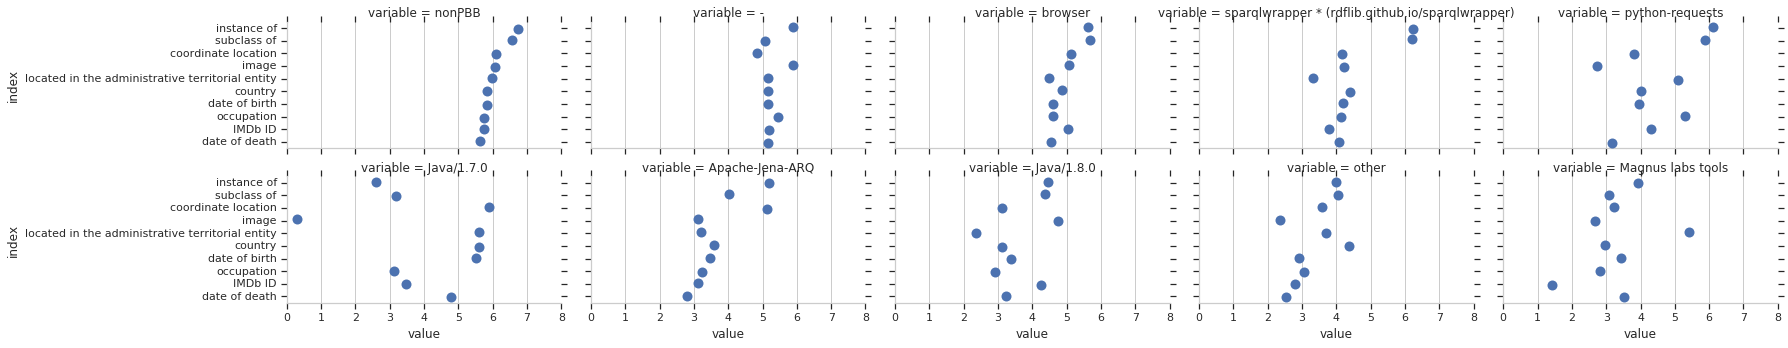

In [103]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=5, height=2.5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(0, 8))

In [124]:
# biomedical properties
PROPS = {'P685', 'P4196', 'P698', 'P659', 'P686', 'P702', 'P231', 'P4229', 'P1057', 'P3841', 'P1748', 'P932',  'P4271', 'P594', 'P1310', 'P813',
               'P2868', 'P639', 'P3357', 'P3870', 'P595', 'P234','P645', 'P3331', 'P5270', 'P356', 'P2249', 'P592', 'P3329', 'P274', 'P927', 'P688', 
              'P637', 'P652', 'P4168', 'P4317', 'P2926', 'P684', 'P225', 'P3359', 'P3358', 'P267', 'P1692', 'P233', 'P715', 'P2394', 'P3356', 'P2115', 'P492', 'P2548', 
              'P3860', 'P2871', 'P1065', 'P671', 'P636', 'P1550', 'P1640', 'P3354', 'P3094',  'P494', 'P352', 'P2646', 'P3986', 'P353', 'P2393', 'P2017', 'P2293', 
              'P780', 'P3406', 'P682', 'P1709', 'P661', 'P662', 'P486', 'P1395', 'P351', 'P235', 'P2870', 'P593', 'P2175', 'P354', 'P1554', 'P3355', 'P828', 'P644', 
              'P705', 'P704', 'P683', 'P638', 'P657', 'P591', 'P3853', 'P681', 'P3433', 'P703', 'P171', 'P493', 'P665', 'P3852', 'P699', 'P459', 'P2892', 'P672', 
              'P128', 'P680'}
PROPS = list(map(prop_label.get, PROPS))
bm_prop_df = prop_df.reindex(PROPS).sort_values("nonPBB", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all").astype(int)

In [125]:
total = bm_prop_df.sum(axis=0)
cols = bm_prop_df.columns[total>10000]
bm_prop_df = bm_prop_df[cols]
bm_prop_df.to_csv("bm_prop_df.csv")
bm_prop_df

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,browser__total,Apache-Jena-ARQ,Apache-Jena-ARQ__total,-,-__total,Apache-HttpClient__total,Apache-HttpClient,"robotic,organic__total",browser,MediaWiki/1.30.0-wmf.*__total,MediaWiki/1.30.0-wmf.*
taxon name,44493,4451126,684,2772,43804,4446417,0,0,44493,4451126,689,2251,2251,35141,35141,0,0,1937,689,4504,4504
DOI,14115,8369207,134,281,13967,4706111,277,277,13838,8368930,202,104,104,9,9,0,0,3662815,202,5330,5330
PubChem CID,9323,13311,100,300,9220,12996,21,21,9302,13290,103,7323,7323,8,8,0,0,15,103,1746,1746
genomic start,8948,27351,1029,9448,7909,17543,51,51,8897,27300,1039,321,321,7,7,6943,6943,360,1039,528,528
ICD-10,8694,13114,246,338,8447,12767,5,5,8689,13109,247,6157,6157,8,8,0,0,9,247,2180,2180
MeSH ID,13865,19583,281,316,13579,19240,5319,5319,8546,14264,288,6178,6178,8,8,0,0,27,288,1998,1998
genomic end,8516,22868,643,5450,7867,17229,51,51,8465,22817,649,321,321,7,7,6942,6942,189,649,528,528
ICD-9,7998,12234,152,255,7846,11979,5,5,7993,12229,152,6134,6134,6,6,0,0,0,152,1586,1586
OMIM ID,7997,11643,11,30,7985,11604,911,911,7086,10732,12,6124,6124,8,8,0,0,9,12,848,848
found in taxon,34024,253200,2643,9012,31313,240229,27344,27344,6680,225856,2836,226,226,8,8,3386,3386,3959,2836,0,0


In [129]:
bm_prop_df_log = bm_prop_df.apply(lambda x:np.log10(x+1))

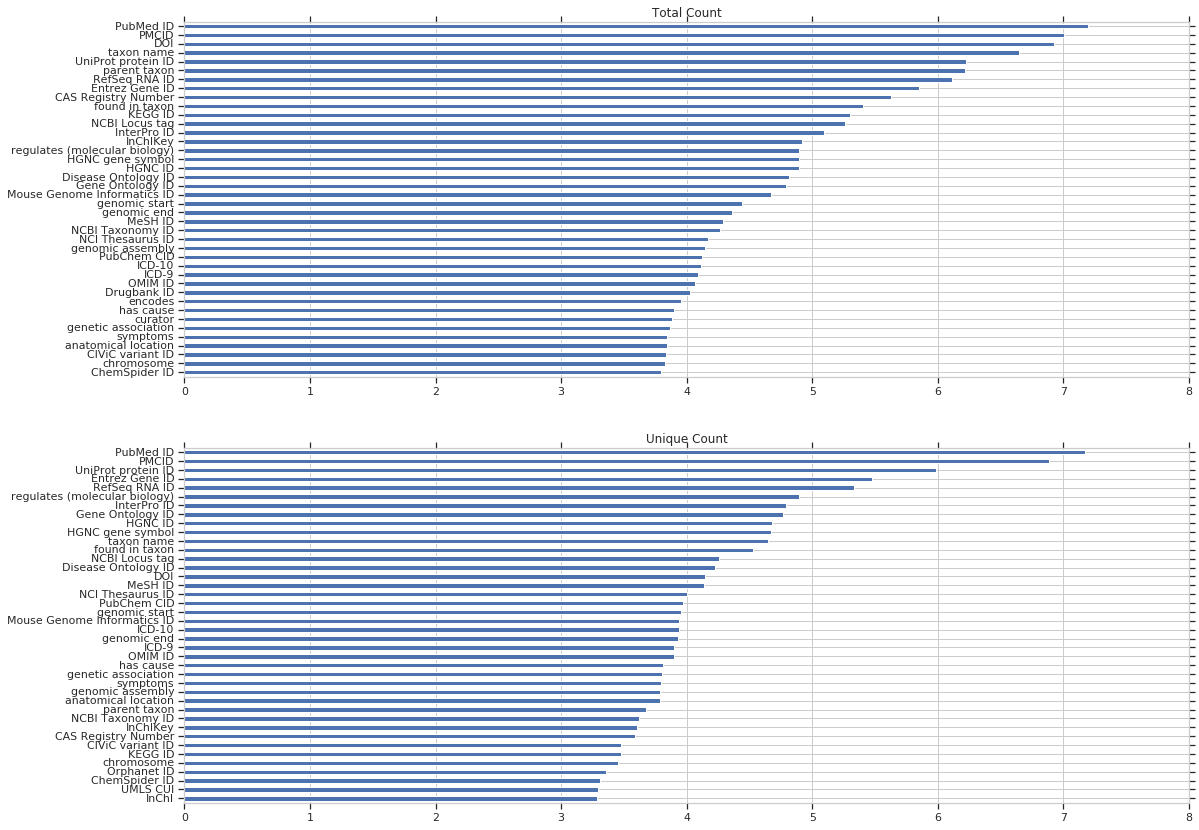

In [130]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("total")[-40:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("unique")[-40:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

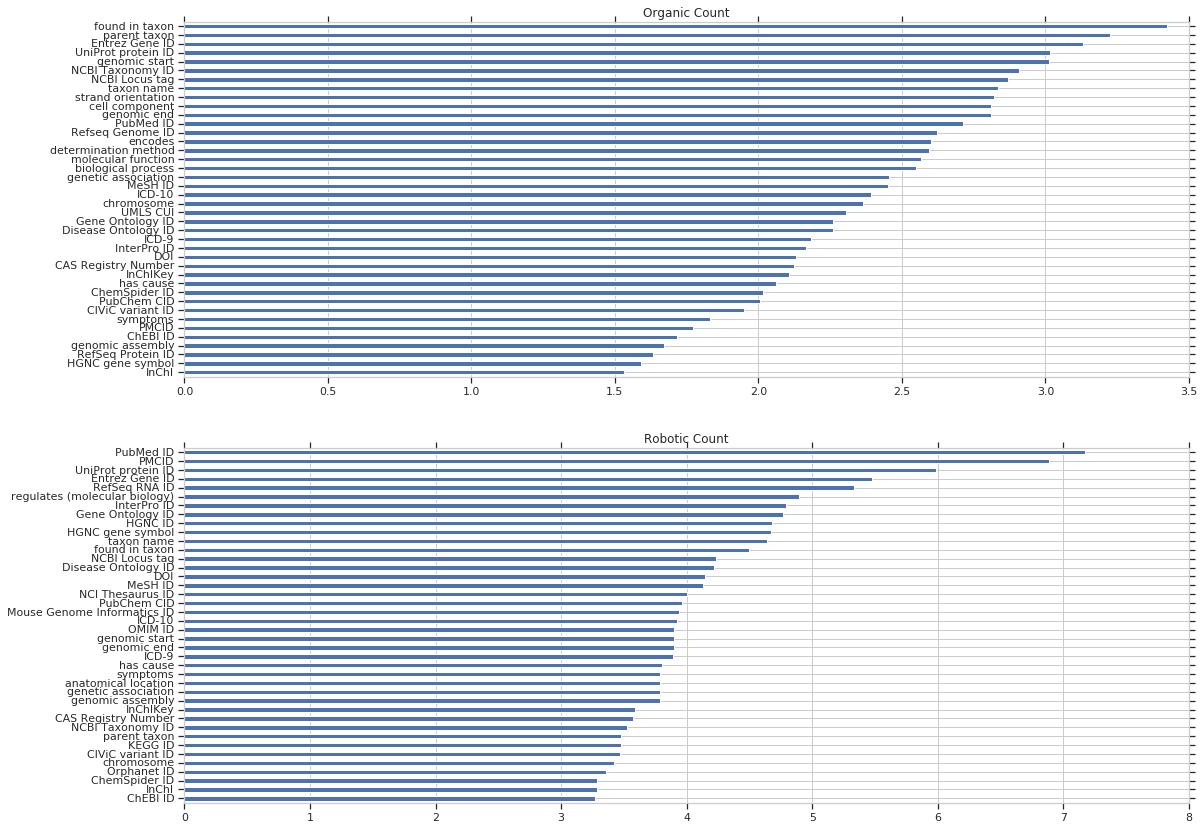

In [131]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = bm_prop_df_log.sort_values("organic")[-40:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = bm_prop_df_log.sort_values("robotic")[-40:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [152]:
ua_cols = set(bm_prop_df_log.columns)-{'unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total', 'robotic,organic__total', 'robotic,organic', 'label'}

ua_prop_df = bm_prop_df_log.loc[:,ua_cols]
ua_prop_df_total = ua_prop_df[ua_prop_df.columns[ua_prop_df.columns.str.contains("__total")]]
ua_prop_df_unique = ua_prop_df[ua_prop_df.columns[~ua_prop_df.columns.str.contains("__total")]]

top_props = set(ua_prop_df_total.sum(axis=1).sort_values(ascending=False)[:20].index) | set(ua_prop_df_unique.sum(axis=1).sort_values(ascending=False)[:20].index)
ua_prop_df_total = ua_prop_df_total[ua_prop_df_total.index.isin(top_props)]
ua_prop_df_unique = ua_prop_df_unique[ua_prop_df_unique.index.isin(top_props)]

top_uas_total = ua_prop_df_total.sum(axis=0).sort_values(ascending=False)[:10].index
top_uas_unique = ua_prop_df_unique.sum(axis=0).sort_values(ascending=False)[:10].index
ua_prop_df_total = ua_prop_df_total.loc[:, top_uas_total]
ua_prop_df_unique = ua_prop_df_unique.loc[:, top_uas_unique]

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


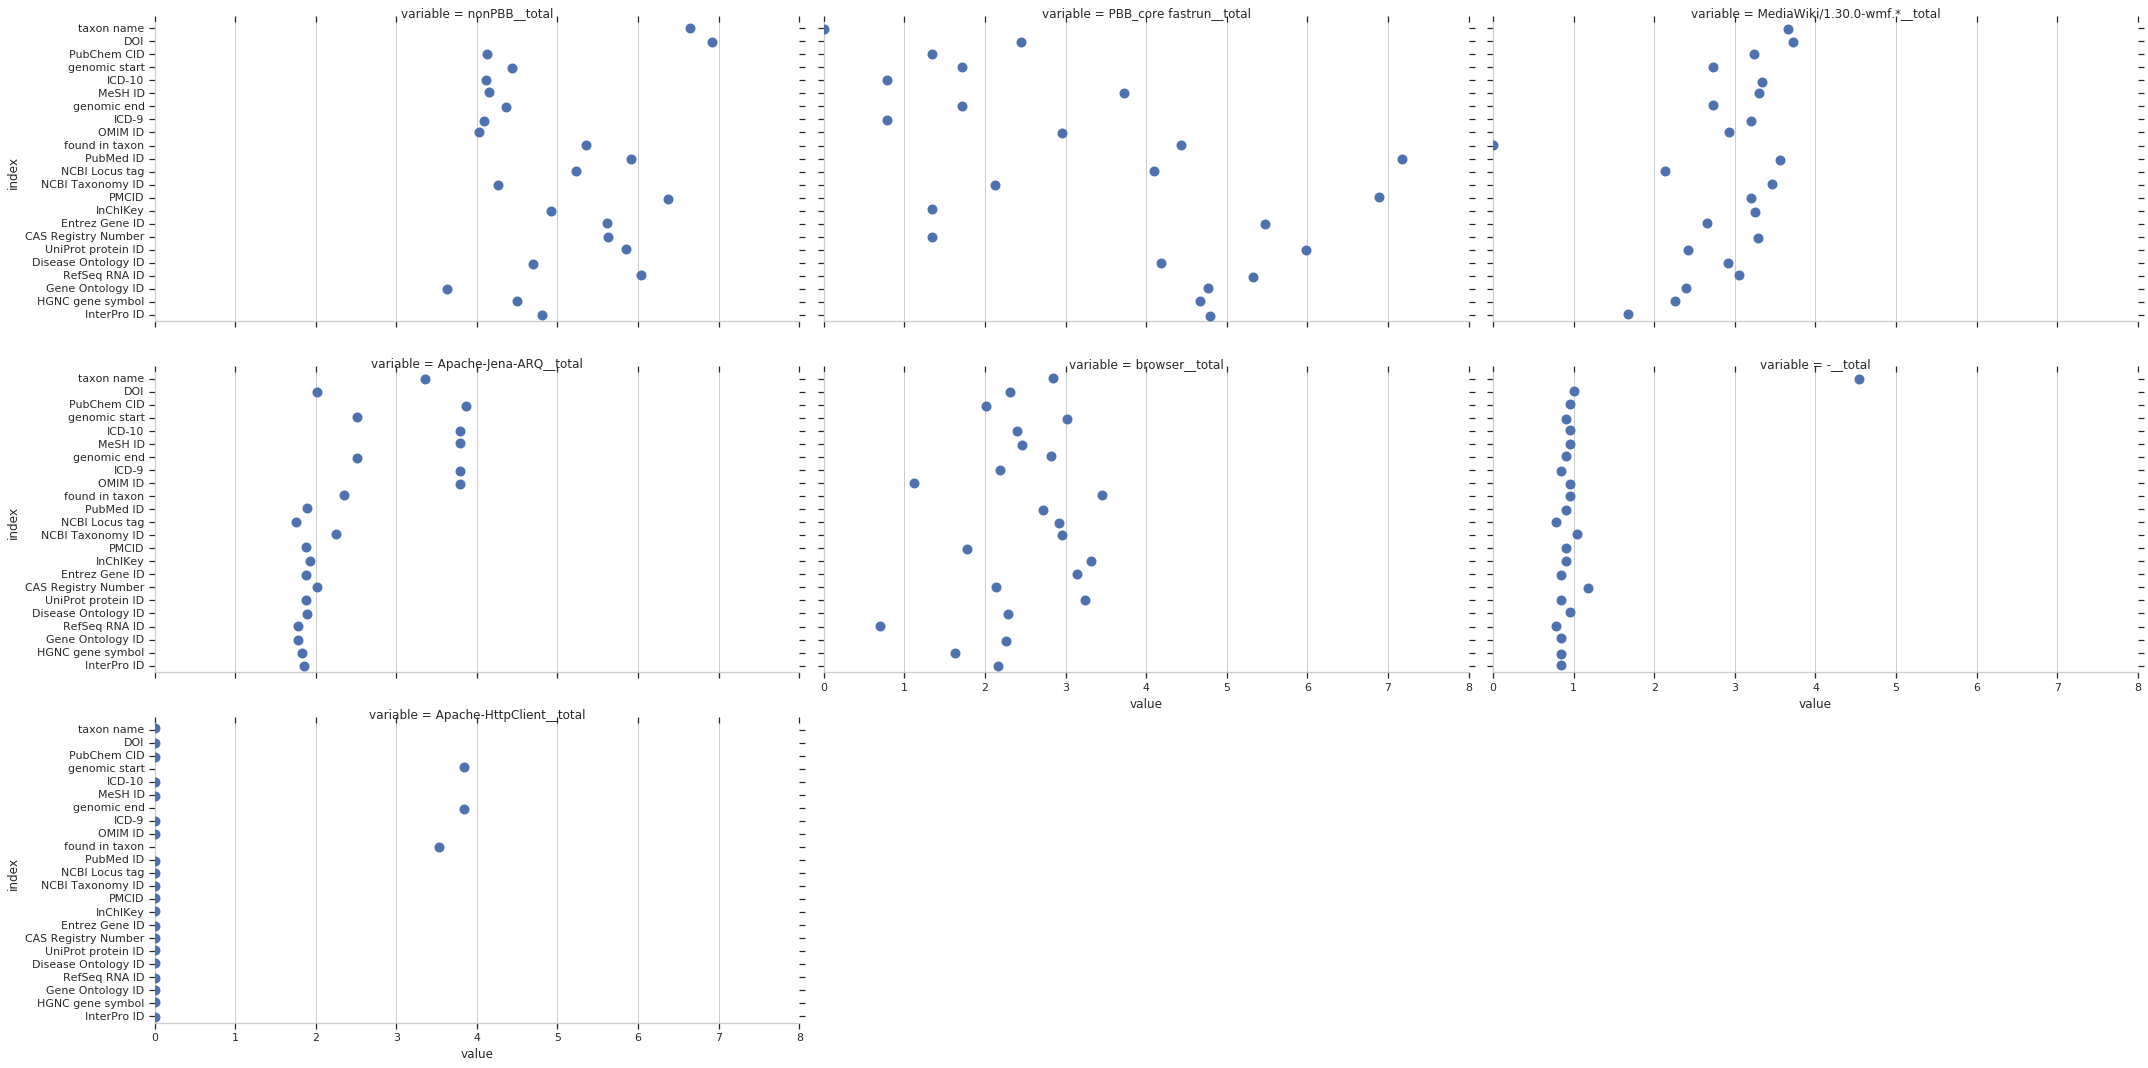

In [158]:
m = ua_prop_df_total.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(0, 8))

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


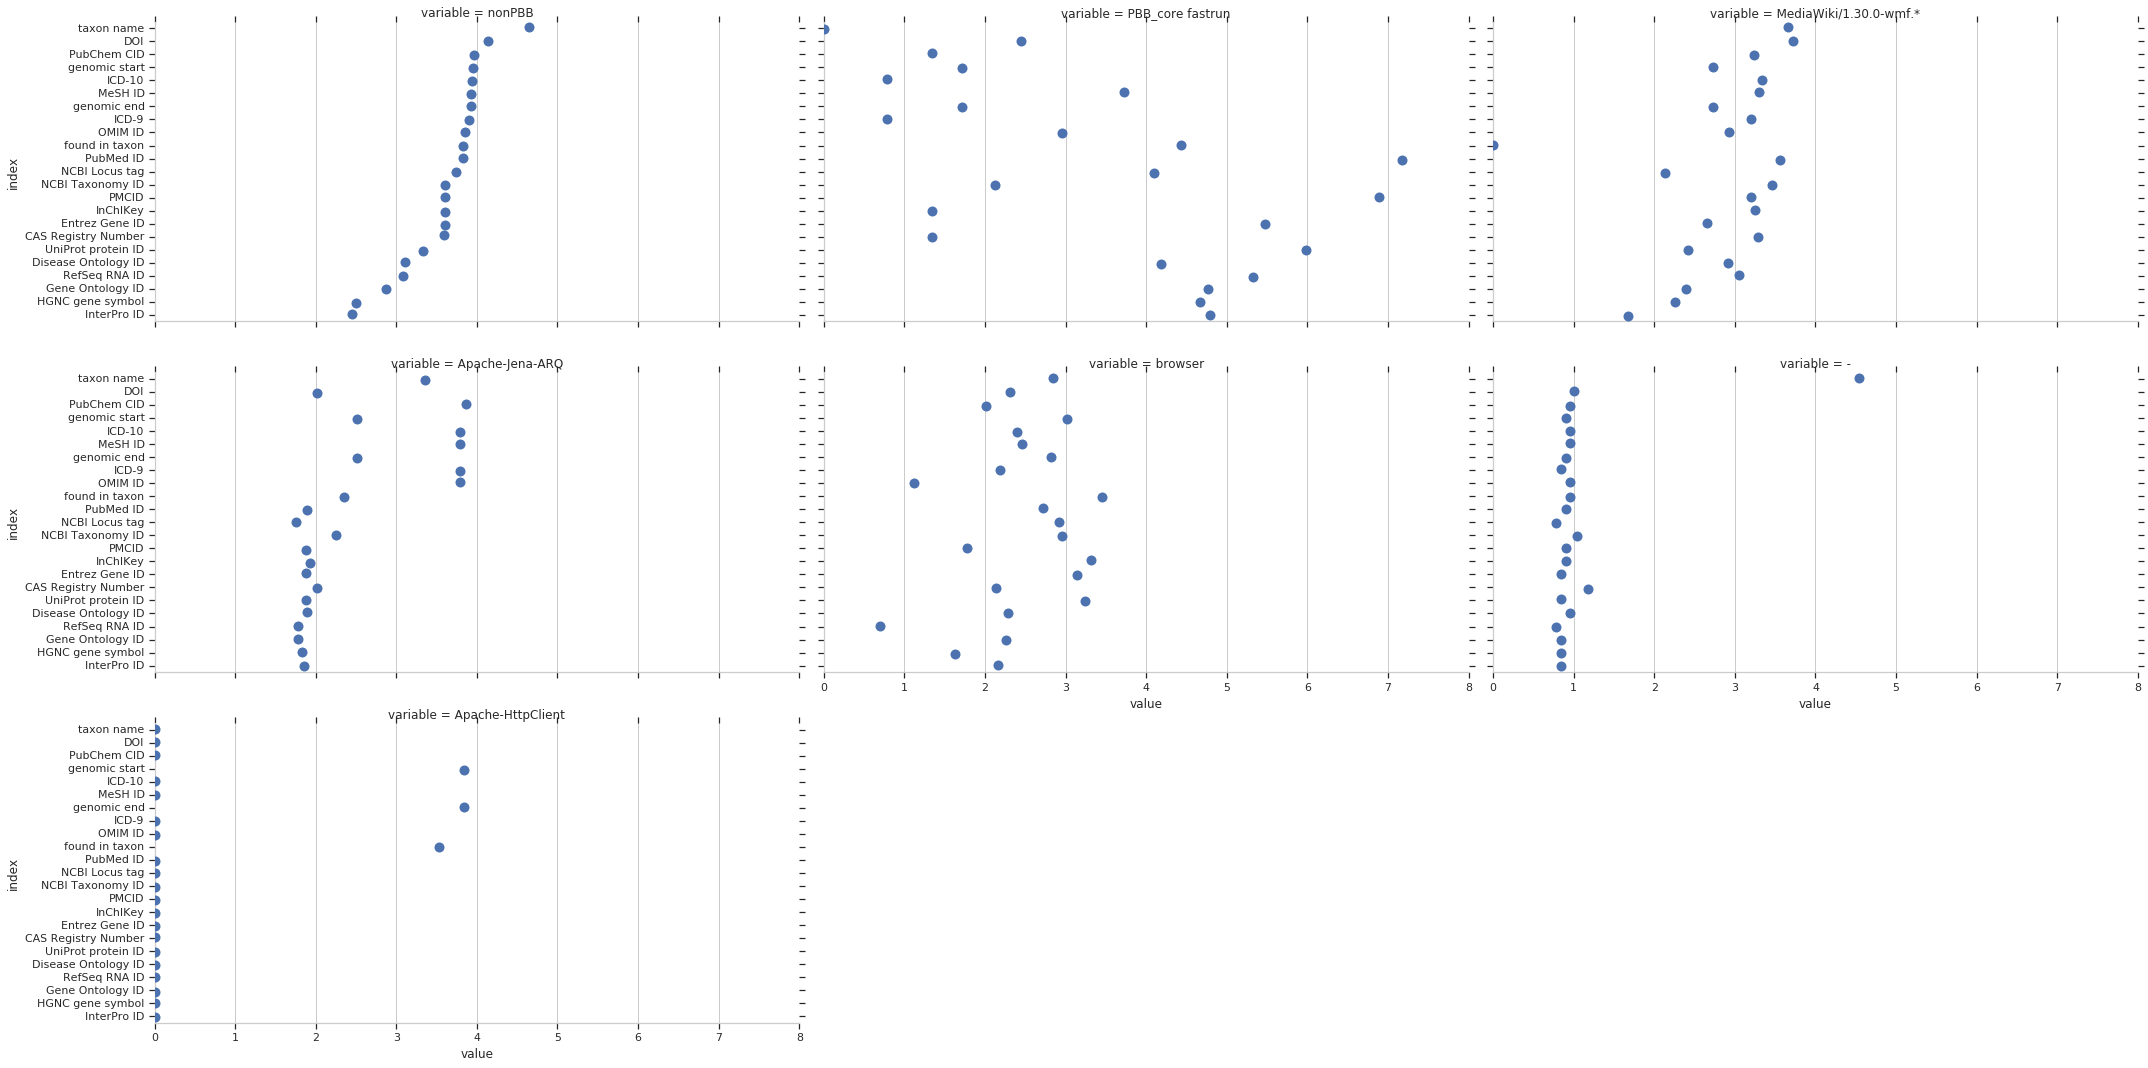

In [159]:
m = ua_prop_df_unique.reset_index().melt(id_vars="index")
g = sns.FacetGrid(m, col="variable", col_wrap=3, height=5, aspect=2)
g.map(sns.stripplot, "value", "index", size=10)
g.set(xlim=(0, 8))

In [ ]:
### items

In [202]:
item_df = pd.read_csv("item_count.csv", index_col=0)
item_df.fillna(0, inplace=True)
item_df = item_df.astype(int)
item_df.head()

,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.6.0,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,MediaWiki/1.30.0-wmf.*,PBB_core fastrun,PetScan,Python-httplib2,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,WikiDataMovieDB,WikidataR - https://github.com/Ironholds/WikidataR,__find_genus,__match_taxon,automatch,awarder,axios,beaTunes,bot_commons,browser,coords2json,curl,https://github.com/bearloga/WikidataQueryServiceR,images_on_wikidata_not_wikipedia,jgonsior-tree,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),missing_wp_animal_audio,new_resolve_authors,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),okhttp/3.4.1,orcid_bot,orcidator,...,Asparagus/Asparagus 0.1__total,C++ WikiAPI__total,GuzzleHttp__total,Jakarta Commons-HttpClient/3.1__total,Java/1.6.0__total,Java/1.7.0__total,Java/1.8.0__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,Magnus labs tools__total,MediaWiki/1.30.0-wmf.*__total,PBB_core fastrun__total,PetScan__total,Python-httplib2__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,WikiDataMovieDB__total,WikidataR - https://github.com/Ironholds/WikidataR__total,__find_genus__total,__match_taxon__total,automatch__total,awarder__total,axios__total,beaTunes__total,bot_commons__total,browser__total,coords2json__total,curl__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,missing_wp_animal_audio__total,new_resolve_authors__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,orcidator__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
Q43229,543429,1903834,504,542885,40,1043,1902292,499,66,33,8,0,0,0,0,0,0,21,0,1,1984,0,4,0,29,151887,0,0,0,0,0,0,0,0,0,0,0,102661,0,1,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,21,0,1,1984,0,4,0,29,151887,0,0,0,0,0,0,0,0,0,0,0,102661,0,1,0,0,0,0,0,0,8,0,0,0,0,14,37629,0,0,249150,0,0,0,0,0
Q5,353023,4056830,20304,331981,738,34547,3492286,529997,11974,103,5419,0,0,1,2212,10,2,1298,0,3232,2014,0,7821,0,2988,200,3,6,0,0,0,0,2,0,0,0,0,21920,0,5,8,0,0,1,0,1964,8,6,2,0,...,0,0,1,2212,10,2,1298,0,3232,2014,0,7821,0,2988,200,3,6,0,0,0,0,2,0,0,0,0,21920,0,5,8,0,0,1,0,1964,8,6,2,0,0,1779,289407,94,3,1464,0,0,1,0,0
Q11424,229746,875451,3608,226027,111,9776,862303,3372,109375,18852,309,0,0,6967,0,5,18,13,0,156,206,0,11,0,41,1,81748,6,0,0,0,0,2,0,0,9,0,4048,0,8,1,115,0,0,0,0,8,6,0,0,...,0,0,6967,0,5,18,13,0,156,206,0,11,0,41,1,81748,6,0,0,0,0,2,0,0,9,0,4048,0,8,1,115,0,0,0,0,8,6,0,0,0,830,193,5,0,6930,0,0,0,0,0
Q4830453,193080,300115,1400,191630,50,2125,294824,3166,60935,1,137,0,0,0,0,0,0,4,0,15,162,0,28,0,11,11,0,5,0,0,0,0,1,0,1,0,0,1452,0,0,4,0,0,0,0,0,8,252,0,0,...,0,0,0,0,0,0,4,0,15,162,0,28,0,11,11,0,5,0,0,0,0,1,0,1,0,0,1452,0,0,4,0,0,0,0,0,8,252,0,0,0,333,129641,1,0,135,0,0,0,0,0
Q17334923,166243,614934,175,166053,15,341,563334,51259,52,6,2,0,0,0,0,0,0,0,0,1,227,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,102306,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,227,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,102306,0,1,0,0,0,0,0,0,0,0,0,0,0,7,63666,0,0,9,0,0,0,0,0


In [203]:
item_df['nonPBB'] = item_df['unique'] - item_df['PBB_core fastrun']
item_df['nonPBB__total'] = item_df['total'] - item_df['PBB_core fastrun__total']

In [204]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total', 'nonPBB', 'nonPBB__total']
cols = list(set(item_df.columns) - set(vc))
item_df = item_df[vc + cols]
item_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Jakarta Commons-HttpClient/3.1__total,missing_wp_animal_audio__total,wdq_image_feed,wdq_image_feed__total,C++ WikiAPI__total,Asparagus/Asparagus 0.1,beaTunes,Pywikibot/3.0-dev__total,awarder__total,jgonsior-tree__total,query__total,QueryBot/0.1__total,__match_taxon,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),other,axios__total,okhttp/3.4.1,wd_edit_stats,PetScan,Apache-Jena-ARQ__total,Apache-Jena-ARQ,Java/1.6.0__total,Asparagus/Asparagus 0.1__total,axios,query,taxon_matcher__total,orcidator__total,rest-client2.0.* (*) ruby/*,Ruby__total,bot_commons__total,WikiDataMovieDB,wd_edit_stats__total,C++ WikiAPI,Java/1.8.0,GuzzleHttp__total,MediaWiki/1.30.0-wmf.*__total,new_resolve_authors__total,orcid_bot__total,Magnus labs tools__total,browser__total,...,automatch,Java/1.8.0__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,https://github.com/bearloga/WikidataQueryServiceR__total,Java/1.7.0__total,MediaWiki/1.30.0-wmf.*,__find_genus,__match_taxon__total,-,curl,Apache-HttpClient,taxon_matcher,testing,Ruby,Pywikibot/3.0-dev,coords2json,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Python-urllib__total,images_on_wikidata_not_wikipedia__total,WikidataR - https://github.com/Ironholds/WikidataR,Python-urllib,automatch__total,okhttp/3.4.1__total,rest-client2.0.* (*) ruby/*__total,coords2json__total,PetScan__total,awarder,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),Jakarta Commons-HttpClient/3.1,python-requests,Magnus labs tools,QueryBot/0.1,sparqlwrapper * (rdflib.github.io/sparqlwrapper),Java/1.6.0,beaTunes__total,orcid_bot,WikiDataMovieDB__total,browser,https://github.com/bearloga/WikidataQueryServiceR,Python-httplib2__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),orcidator,-__total,Apache-HttpClient__total,jgonsior-tree,images_on_wikidata_not_wikipedia,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,new_resolve_authors,python-requests__total
Q43229,543429,1903834,504,1043,542885,1902292,0,0,543429,1903834,0,0,0,0,0,0,0,151887,0,0,0,0,0,0,14,0,0,0,4,8,8,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1984,0,0,1,102661,...,0,21,8,0,0,1984,0,0,66,1,33,0,0,0,151887,0,249150,29,0,0,29,0,0,0,0,4,0,0,0,37629,1,0,249150,0,0,0,0,102661,0,0,8,0,66,33,0,0,0,0,0,37629
Q5,353023,4056830,20304,34547,331981,3492286,0,0,353023,4056830,2212,0,0,0,0,0,0,200,0,0,94,3,0,0,1779,0,6,0,7821,5419,5419,10,0,0,94,0,0,3,6,0,0,0,0,1298,1,2014,1964,2,3232,21920,...,2,1298,8,8,2,2014,0,0,11974,5,103,0,0,6,200,0,1464,2988,0,0,2988,2,6,3,0,7821,0,0,2212,289407,3232,3,1464,10,0,2,0,21920,8,0,8,0,11974,103,0,0,1,0,1964,289407
Q11424,229746,875451,3608,9776,226027,862303,0,0,229746,875451,0,0,0,0,0,0,9,1,0,0,5,81748,0,0,830,0,6,0,11,309,309,5,0,0,5,0,0,0,6,0,0,0,0,13,6967,206,0,0,156,4048,...,2,13,8,1,18,206,0,0,109375,8,18852,0,0,6,1,0,6930,41,115,0,41,2,6,0,0,11,0,0,0,193,156,81748,6930,5,9,0,0,4048,1,0,8,0,109375,18852,0,115,0,0,0,193
Q4830453,193080,300115,1400,2125,191630,294824,0,0,193080,300115,0,0,0,0,0,0,0,11,0,0,1,0,0,0,333,1,252,0,28,137,137,0,0,1,1,0,0,0,5,0,0,0,0,4,0,162,0,0,15,1452,...,1,4,8,4,0,162,0,0,60935,0,1,0,0,5,11,0,135,11,0,0,11,1,252,0,0,28,0,0,0,129641,15,0,135,0,0,0,0,1452,4,0,8,0,60935,1,0,0,0,0,0,129641
Q17334923,166243,614934,175,341,166053,563334,0,0,166243,614934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,227,0,0,1,102306,...,2,0,0,0,0,227,0,0,52,1,6,0,0,0,0,0,9,2,0,0,2,2,0,0,0,1,0,0,0,63666,1,0,9,0,0,0,0,102306,0,0,0,0,52,6,0,0,0,0,0,63666


In [205]:
def get_items_label(qids):
    items = wdi_core.WDItemEngine.generate_item_instances(qids)
    qid_label = {x:y.get_label() for x,y in items}
    return [qid_label[qid] for qid in qids]
get_item_label(["Q43229", "Q5", "Q11424"])

['organization', 'human', 'film']

In [206]:
item_df['label'] = None
item_df.loc[:50, 'label'] = get_items_label(list(item_df.index[:50]))
cols = list(item_df.columns)
item_df = item_df[cols[-1:] + cols[:-1]]
item_df.head(50)

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Jakarta Commons-HttpClient/3.1__total,missing_wp_animal_audio__total,wdq_image_feed,wdq_image_feed__total,C++ WikiAPI__total,Asparagus/Asparagus 0.1,beaTunes,Pywikibot/3.0-dev__total,awarder__total,jgonsior-tree__total,query__total,QueryBot/0.1__total,__match_taxon,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),other,axios__total,okhttp/3.4.1,wd_edit_stats,PetScan,Apache-Jena-ARQ__total,Apache-Jena-ARQ,Java/1.6.0__total,Asparagus/Asparagus 0.1__total,axios,query,taxon_matcher__total,orcidator__total,rest-client2.0.* (*) ruby/*,Ruby__total,bot_commons__total,WikiDataMovieDB,wd_edit_stats__total,C++ WikiAPI,Java/1.8.0,GuzzleHttp__total,MediaWiki/1.30.0-wmf.*__total,new_resolve_authors__total,orcid_bot__total,Magnus labs tools__total,...,automatch,Java/1.8.0__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,https://github.com/bearloga/WikidataQueryServiceR__total,Java/1.7.0__total,MediaWiki/1.30.0-wmf.*,__find_genus,__match_taxon__total,-,curl,Apache-HttpClient,taxon_matcher,testing,Ruby,Pywikibot/3.0-dev,coords2json,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Python-urllib__total,images_on_wikidata_not_wikipedia__total,WikidataR - https://github.com/Ironholds/WikidataR,Python-urllib,automatch__total,okhttp/3.4.1__total,rest-client2.0.* (*) ruby/*__total,coords2json__total,PetScan__total,awarder,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),Jakarta Commons-HttpClient/3.1,python-requests,Magnus labs tools,QueryBot/0.1,sparqlwrapper * (rdflib.github.io/sparqlwrapper),Java/1.6.0,beaTunes__total,orcid_bot,WikiDataMovieDB__total,browser,https://github.com/bearloga/WikidataQueryServiceR,Python-httplib2__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),orcidator,-__total,Apache-HttpClient__total,jgonsior-tree,images_on_wikidata_not_wikipedia,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,new_resolve_authors,python-requests__total
Q43229,organization,543429,1903834,504,1043,542885,1902292,0,0,543429,1903834,0,0,0,0,0,0,0,151887,0,0,0,0,0,0,14,0,0,0,4,8,8,0,0,0,0,0,0,0,0,0,0,0,0,21,0,1984,0,0,1,...,0,21,8,0,0,1984,0,0,66,1,33,0,0,0,151887,0,249150,29,0,0,29,0,0,0,0,4,0,0,0,37629,1,0,249150,0,0,0,0,102661,0,0,8,0,66,33,0,0,0,0,0,37629
Q5,human,353023,4056830,20304,34547,331981,3492286,0,0,353023,4056830,2212,0,0,0,0,0,0,200,0,0,94,3,0,0,1779,0,6,0,7821,5419,5419,10,0,0,94,0,0,3,6,0,0,0,0,1298,1,2014,1964,2,3232,...,2,1298,8,8,2,2014,0,0,11974,5,103,0,0,6,200,0,1464,2988,0,0,2988,2,6,3,0,7821,0,0,2212,289407,3232,3,1464,10,0,2,0,21920,8,0,8,0,11974,103,0,0,1,0,1964,289407
Q11424,film,229746,875451,3608,9776,226027,862303,0,0,229746,875451,0,0,0,0,0,0,9,1,0,0,5,81748,0,0,830,0,6,0,11,309,309,5,0,0,5,0,0,0,6,0,0,0,0,13,6967,206,0,0,156,...,2,13,8,1,18,206,0,0,109375,8,18852,0,0,6,1,0,6930,41,115,0,41,2,6,0,0,11,0,0,0,193,156,81748,6930,5,9,0,0,4048,1,0,8,0,109375,18852,0,115,0,0,0,193
Q4830453,business,193080,300115,1400,2125,191630,294824,0,0,193080,300115,0,0,0,0,0,0,0,11,0,0,1,0,0,0,333,1,252,0,28,137,137,0,0,1,1,0,0,0,5,0,0,0,0,4,0,162,0,0,15,...,1,4,8,4,0,162,0,0,60935,0,1,0,0,5,11,0,135,11,0,0,11,1,252,0,0,28,0,0,0,129641,15,0,135,0,0,0,0,1452,4,0,8,0,60935,1,0,0,0,0,0,129641
Q17334923,location,166243,614934,175,341,166053,563334,0,0,166243,614934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,227,0,0,1,...,2,0,0,0,0,227,0,0,52,1,6,0,0,0,0,0,9,2,0,0,2,2,0,0,0,1,0,0,0,63666,1,0,9,0,0,0,0,102306,0,0,0,0,52,6,0,0,0,0,0,63666
Q15642541,human-geographic territorial entity,159973,1150201,25,52,159942,1147713,0,0,159973,1150201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,0,0,0,...,0,0,0,0,0,150,0,0,48166,0,0,0,0,0,0,0,11,2,0,0,2,0,0,0,0,0,0,0,0,111617,0,0,11,0,0,0,0,32,0,0,0,0,48166,0,0,0,0,0,0,111617
Q811430,construction,15

In [216]:
## look at all diseases
disease_qids = wdi_helpers.id_mapper("P699").values()
bm_item_df = item_df.reindex(disease_qids).sort_values("nonPBB", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all")

In [230]:
total = bm_item_df.sum(axis=0)
cols = bm_item_df.columns[total>1000]
bm_item_df = bm_item_df[cols]
bm_item_df = bm_item_df.astype(int)
bm_item_df.loc[:50, 'label'] = get_items_label(list(bm_item_df.index[:50]))
cols = list(bm_item_df.columns)
bm_item_df = bm_item_df[cols[-1:] + cols[:-1]]
bm_item_df.to_csv("bm_item_df.csv")
bm_item_df

,label,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Apache-Jena-ARQ__total,Apache-Jena-ARQ,browser__total,images_on_wikidata_not_wikipedia__total,python-requests,browser,images_on_wikidata_not_wikipedia,python-requests__total
Q12136,disease,828,2773,684,963,140,1627,2,2,826,2771,6,6,692,0,21,692,0,21
Q23037771,goat milk allergy,515,2221,0,0,515,2221,0,0,515,2221,0,0,1,0,513,1,0,513
Q179951,strabismus,403,422,0,0,403,422,0,0,403,422,13,13,1,386,0,1,386,0
Q8388,pedophilia,384,421,0,0,384,421,0,0,384,421,13,13,1,353,10,1,353,10
Q132971,dyslexia,317,372,1,4,316,368,0,0,317,372,16,16,2,291,5,2,291,5
Q183560,intellectual disability,300,335,2,2,298,333,0,0,300,335,15,15,5,263,8,5,263,8
Q742672,dyscalculia,281,294,0,0,281,294,0,0,281,294,13,13,1,262,0,1,262,0
Q622604,pyromania,278,295,0,0,278,295,0,0,278,295,13,13,3,260,0,3,260,0
Q780629,panniculitis,274,291,0,0,274,291,0,0,274,291,13,13,1,258,0,1,258,0
Q1452604,multiple epiphyseal dysplasia,268,283,0,0,268,283,0,0,268,283,13,13,1,253,0,1,253,0


In [46]:
### cooccurence_P

In [50]:
cop_df = pd.read_csv("cooccurence_P.csv", index_col=0)
cop_df.fillna(0, inplace=True)
cop_df = cop_df.astype(int)
cop_df.head()

,unique,total,organic,organic__total,robotic,"robotic,organic","robotic,organic__total",robotic__total,-,-__total,Apache-HttpClient,Apache-HttpClient__total,Apache-Jena-ARQ,Apache-Jena-ARQ__total,Asparagus/Asparagus 0.1,Asparagus/Asparagus 0.1__total,C++ WikiAPI,C++ WikiAPI__total,GuzzleHttp,GuzzleHttp__total,...,python-requests,python-requests__total,query,query__total,rest-client2.0.* (*) ruby/*,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher,taxon_matcher__total,testing,testing__total,thorough_name_match,thorough_name_match__total,update_dynamic,update_dynamic__total,wd_edit_stats,wd_edit_stats__total,wdq_image_feed,wdq_image_feed__total
P698|P698,4853459,4878342,1,1,4853458,0,0,4878341,0,0,0,0,0,0,0,0,6,60,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P279|P31,3244643,13385859,53390,97424,3185556,5697,696669,12591766,173619,755895,1665,52165,2905,116733,0,0,1,44,0,0,...,508041,3255861,39,97,757,2329,1638496,3833317,540,104045,0,0,0,0,0,0,0,0,1,3
P932|P932,2212168,2218368,11,11,2212157,0,0,2218357,0,0,0,0,0,0,0,0,5,602,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P1282|P1282,1176182,1940495,10,12,1176136,36,126,1940357,0,0,0,0,0,0,0,0,10,623,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P17|P625,888474,3230980,10385,25783,877894,195,3673,3201524,22016,62447,4,34,2350,47756,0,0,0,0,0,0,...,5304,614653,12,14,0,0,16764,44675,0,0,0,0,0,0,0,0,0,0,0,0
